## Testing the ReFH2 loss removal 

### <ins> How do the antecedent conditions impact loss removal from observed events in ReFH2? </ins>
This script contains analysis of the impact of varying the antecedent conditions on the net rainfall generated by ReFH2.    

The same synthetic rainfall events (for cluster numbers 1 and 5) were fed into ReFH2 multiple times, each time using different antecedent conditions. The antecedent condition options were:
* The mean rainfall (1.78mm) for the catchment 
* The 25th percentile rainfall (0mm) for the catchment 
* The 50th percentile rainfall (0.1mm) for the catchment
* The 90th percentile rainfall (5.5mm) for the catchment
* The 95th percentile rainfall (8.6mm) for the catchment
* The 99th percentile rainfall (18.3mm) for the catchment 


    * 4 days previous to the event
    * 15 days previous to the event
    * 365 days previous to the event

SURELY APPLYING THE SAME RAINFALL RATE FOR 365 DAYS BEFORE THE EVENT WOULD HAVE MASSIVE EFFEFCT???


#### General results 
The <ins>wetter</ins> the antecedent conditions then the <ins> higher </ins> the net rainfall:
* Wetter antecedent conditions --> 
* A more saturated catchment with less ability to absorb water --> 
* Less subtraction of losses from the incident rainfall --> 
* A higher net rainfall

For the 97th percentile, the lengh of time the antecedent conditions are applied for makes no difference. This might be because supplying this level of rainfall for just one day (or upt o 3 days) already causes the catchment to be saturated. 

However, for the mean, the longer the antecedent conditions are supplied for then the lower the net rainfall. Lower net rainfall means that more losses have been subtracted, which suggests a drier catchment. Maybe in this case this is because the mean rainfall is lower than the rainfall amount that would be specified in the background??

* Longer antecedent rainfall period --> More losses removed --> Drier catchment --> Implies that 
* Shorter antecedent rainfall period --> Less losses removed --> Wetter catchment --> Implies that ?

#### Code initialisation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime, timedelta

from Functions import make_plot

## Comparing the rainfall after losses have been subtracted 
The rainfall rate after subtraction of losses is plotted for a number of different antecedent conditions, for both cluster 1 and cluster 5.   
The rainfall rates are all applied over 15 days.  
At higher percentiles, with wetter antecedent conditions, the loss removal is smaller (as expected) because the catchment is already more saturated. 

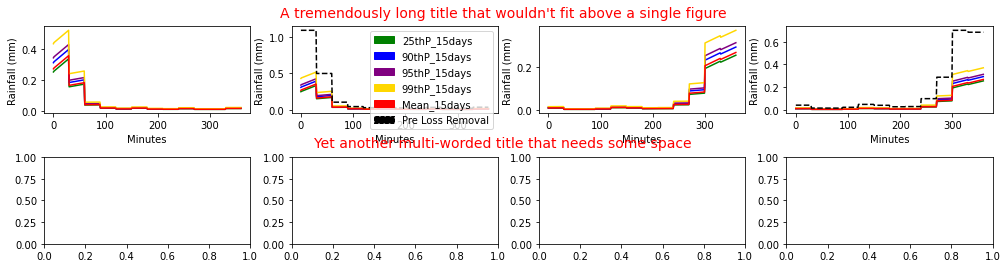

In [14]:
fig, axs = plt.subplots(2,4, figsize = (17,4))
# Cluster 1
make_plot(axs, 0,1,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper right', False)
make_plot(axs, 1 ,1,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper right', True)
# Cluster 5
make_plot(axs, 2,5,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper left', False)
make_plot(axs, 3, 5,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper left', True)
plt.figtext(0.5,0.95, "A tremendously long title that wouldn't fit above a single figure", ha="center", va="top", fontsize=14,
            color="r")
plt.figtext(0.5,0.5, "Yet another multi-worded title that needs some space", ha="center", va="top", fontsize=14, color="r")
plt.subplots_adjust(hspace = 0.5 )
# # Cluster 1
# make_plot(axs, 4,1,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
#                            ['green', 'blue', 'purple',  'red'], 'upper right', False)
# make_plot(axs, 5,1,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
#                            ['green', 'blue', 'purple', 'red'], 'upper right', True)
# # Cluster 5
# make_plot(axs, 6,5,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
#                            ['green', 'blue', 'purple',  'red'], 'upper left', False)
# make_plot(axs, 7,5,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
#                            ['green', 'blue', 'purple',  'red'], 'upper left', True)

In [ ]:
roberto_profiles_fp = "../RobertoProfiles/"

fig = plt.figure(constrained_layout=True, figsize = (20,14))
# fig.suptitle('Figure title', fontsize = 20)            # set global suptitle if desired
(subfig1, subfig2, subfig3, subfig4) = fig.subfigures(4,2) # create 2x1 subfigures
(ax1, ax2) = subfig1[0].subplots(1, 2)       # create 1x2 subplots on subfig1
(ax3, ax4) = subfig1[1].subplots(1, 2)    
(ax5, ax6) = subfig2[0].subplots(1, 2)    
(ax7, ax8) = subfig2[1].subplots(1, 2)    
(ax9, ax10) = subfig3[0].subplots(1, 2)    
(ax11, ax12) = subfig3[1].subplots(1, 2)    

plt.figtext(0.5,1.01, "4 days", ha="center", va="top", fontsize=20)
plt.figtext(0.5,0.76, "15 days", ha="center", va="top", fontsize=20)
plt.figtext(0.5,0.56, "365 days", ha="center", va="top", fontsize=20)

subfig1[0].suptitle('Cluster 1', fontsize = 14)             
make_plot(ax1, 0,1,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper right', False)
make_plot(ax2, 1 ,1,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper right', True)
subfig1[1].suptitle('Cluster 5', fontsize = 14)             
make_plot(ax3, 0,5,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper right', False)
make_plot(ax4, 1 ,5,['25thP_15days', "90thP_15days",  "95thP_15days", "99thP_15days", "Mean_15days"],
                           ['green', 'blue', 'purple', 'gold', 'red'], 'upper right', True)
########## 15 days
# Cluster 1
subfig2[0].suptitle('Cluster 5', fontsize = 14)
make_plot(ax5, 4,1,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple',  'red'], 'upper right', False)
make_plot(ax6, 5,1,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple', 'red'], 'upper right', True)
subfig2[1].suptitle('Cluster 5', fontsize = 14)  
# Cluster 5
make_plot(ax7, 6,5,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', False)
make_plot(ax8, 7,5,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', True)
########## 365 days
# Cluster 1
subfig3[0].suptitle('Cluster 1', fontsize = 14)
make_plot(ax9,5,1,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple',  'red'], 'upper right', False)
make_plot(ax10, 5, 1,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple', 'red'], 'upper right', True)
# Cluster 5
subfig3[1].suptitle('Cluster 5', fontsize = 14)
make_plot(ax11,5, 5,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', False)
make_plot(ax12,5, 5,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', True)

#### 4 days

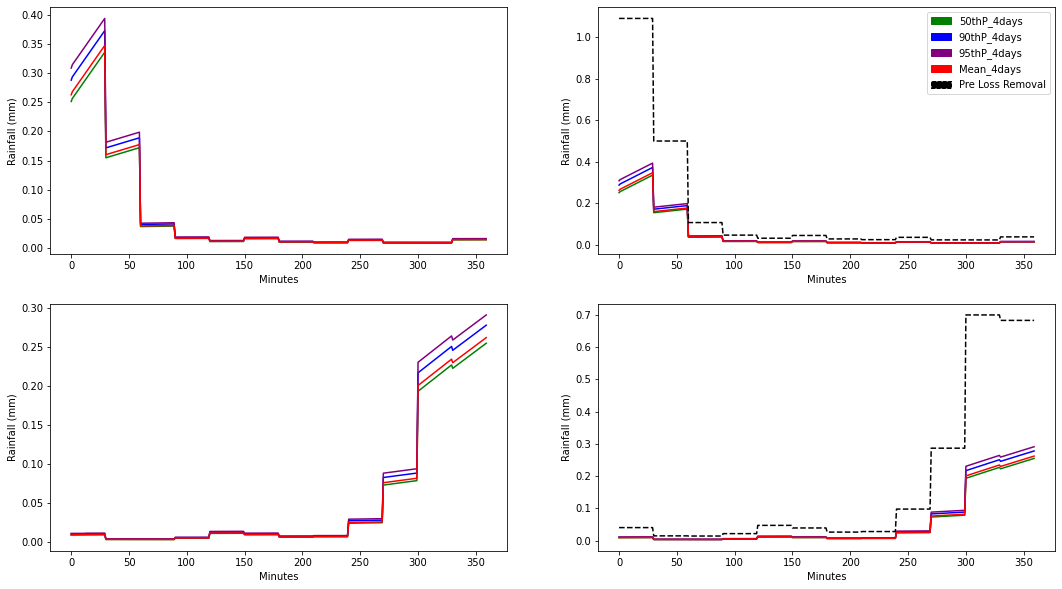

In [3]:
fig, axs = plt.subplots(2,2, figsize = (18,10))
# Cluster 1
make_plot(axs, 0,1,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple',  'red'], 'upper right', False)
make_plot(axs, 1,1,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple', 'red'], 'upper right', True)
# Cluster 5
make_plot(axs, 2,5,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', False)
make_plot(axs, 3,5,['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', True)

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (18,10))
# Cluster 1
make_plot(axs[0,0],1,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple',  'red'], 'upper right', False)
make_plot(axs[0,1],1,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple', 'red'], 'upper right', True)
# Cluster 5
make_plot(axs[1,0],5,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', False)
make_plot(axs[1,1],5,['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"],
                           ['green', 'blue', 'purple',  'red'], 'upper left', True)

## Comparing the number of days applied for
* Mean (0.51mm):
    * 4 days and 15 days are almost identical
    * 365 days the post-loss removal rainfall is considerably lower, so more rainfall has been removed. 
* 97th Percentile (5.2mm):
    * 4 days, 15 days and 365 days are all almost identical
    
97th percentile has a higher post loss removal rainfall than mean, suggesting less rainfall has been removed. This doesn't make sense.

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (18,10))
make_plot(axs[0,0],5,['Mean_4days', "Mean_15days", "Mean_365days"],
                           ['lightcoral', 'red', 'darkred'], 'upper left', False)
make_plot(axs[0,1],5,['Mean_4days', "Mean_15days", "Mean_365days"],
                           ['lightcoral', 'red', 'darkred'], 'upper left', True)
make_plot(axs[1,0],1,['Mean_4days', "Mean_15days", "Mean_365days"],
                           ['lightcoral', 'red', 'darkred'], 'upper left', False)
make_plot(axs[1,1],1,['Mean_4days', "Mean_15days", "Mean_365days"],
                           ['lightcoral', 'red', 'darkred'], 'upper left', True)

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (18,10))
make_plot(axs, 0 ,1,['90thP_4days', "90thP_15days", "90thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'],  'upper left', False)
make_plot(axs[0,1],1,['90thP_4days', "90thP_15days", "90thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'], 'upper left', True)
make_plot(axs[1,0],5,['90thP_4days', "90thP_15days", "90thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'], 'upper left', False)
make_plot(axs[1,1],5,['90thP_4days', "90thP_15days", "90thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'],  'upper left', True)

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (18,10))
make_plot(axs[0,0],1,['95thP_4days', "95thP_15days", "95thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'],  'upper right', False)
make_plot(axs[0,1],1,['95thP_4days', "95thP_15days", "95thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'], 'upper left', True)
make_plot(axs[1,0],5,['95thP_4days', "95thP_15days", "95thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'], 'upper left', False)
make_plot(axs[1,1],5,['95thP_4days', "95thP_15days", "95thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'],  'upper left', True)

In [ ]:
# 15 days and 4 days are the same
fig, axs = plt.subplots(2,2, figsize = (18,10))
make_plot(axs[0,0],1,['50thP_4days', "50thP_15days", "50thP_365days"],
                           ['mediumslateblue', 'blue', 'navy'],  'upper right', False)
# make_plot(axs[0,1],1,['50thP_4days', "50thP_15days", "50thP_365days"],
#                            ['mediumslateblue', 'blue', 'navy'], 'upper left', True)
# make_plot(axs[1,0],5,['50thP_4days', "50thP_15days", "50thP_365days"],
#                            ['mediumslateblue', 'blue', 'navy'], 'upper left', False)
# make_plot(axs[1,1],5,['50thP_4days', "50thP_15days", "50thP_365days"],
#                            ['mediumslateblue', 'blue', 'navy'],  'upper left', True)

## Testing difference: ReFH2 design rainfall loss removal & observed rainfall loss removal

Using design rainfall ReFH2 removes losses automatically. You don't have to specifiy antecedent conditions, and it's not clear how this loss removal is decided and what assumptions are made. When you use observed rainfall you do have to specify antecedent conditions.

To assess the difference in these approaches:
* A 6hr, 100 year return period event is specified in ReFH2 
* The 'Total event rainfall' from this is then fed back into ReFH2 as an observed rainfall event, using a variety of antecedent conditions 
* This allows comparison of the 'Net rainfall' from the design rainfall ReFH2 loss calculation process, and the observed rainfall loss calculation process

This shows that the 4 antecedent rainfall condition options that gave almost identical results for the synthetic rainfall events also give almost identical results here, and that these in turn are almost identical to the removal of losses by ReFH2 in the design rainfall process.  
The scenario using a much higher rainfall rate in the antecedent conditions has considerably higher rainfall rates post loss removal.

In [ ]:
def singlepeak_plot(ax, options, colors, include_post_loss_removal = True):
    # List to store patches to make legend
    patches = []
    # Plot each of the antecedent condition options, and add a patch for to patches list for legend
    for number,option in enumerate(options):
        # Add to patches
        patch = mpatches.Patch(color=colors[number], label=options[number])
        patches.append(patch)
        # Read in data, clean it and plot it
        post_loss_removal_df = pd.read_csv(roberto_profiles_fp + "PostLossRemoval/6hr_100yrRP/{}/singlepeak_urban_summer.csv".format(option))
        post_loss_removal_df = clean_dfs(post_loss_removal_df)
        ax.plot(post_loss_removal_df['Time'], post_loss_removal_df[post_loss_removal_df.columns[5]], color = colors[number])
    
    # Include the ReFH2 design rainfall post loss removal
    pre_loss_removal = pd.read_csv(roberto_profiles_fp + "PostLossRemoval/6hr_100yrRP/SinglePeak_6h1_1min_100yr/Urban.csv")
    pre_loss_removal['Time'] = post_loss_removal_df['Time'][0:360]
    ax.plot(pre_loss_removal['Time'], pre_loss_removal['Total net rain mm (100 year) - urbanised model'], color = 'green')
    
    patch = mpatches.Patch(color='green', label='RefH2 loss removal', linestyle = 'dashed')
    patches.append(patch)
    # Plot the pre-loss removal rainfall
    if include_post_loss_removal == True:
        ax.plot(pre_loss_removal['Time'], pre_loss_removal['100 year design rainfall - FEH 2013 model'], color = 'black', 
               linestyle = 'dashed')
    
        patch = mpatches.Patch(color='black', label='Pre Loss Removal', linestyle = 'dashed')
        patches.append(patch)
    # Format plot    
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Rainfall (mm)")
    plt.legend(handles=patches, loc="upper right", fontsize= 10)

In [ ]:
options = ['25thP_15days', "50thP_15days", "90thP_15days", "95thP_15days", "Mean_15days"]
colors = ['yellow','orange','red','darkred','purple']    
    
fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options, colors, False)
singlepeak_plot(axs[1], options, colors)

In [ ]:
options = ["0.51mm_old_mean"]
colors = ['gold']    
    
fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options, colors, False)
singlepeak_plot(axs[1], options, colors)